In [1]:
from fundfunctions import *
from solvers import *
from kdi import *
from observables import *

In [4]:
def dmcalc(f, lc):
    return -f*GHz*lc/(c*re*pctocm)

In [10]:
lensc()

1491.0828730921944

In [2]:
dso, dsl, f, dm, ax, ay = 1.1*kpc*pctocm, 0.55*kpc*pctocm, 0.8*GHz, 2e-6*pctocm, 0.02*autocm, 0.03*autocm
alp = alpha(dso, dsl, f, dm)
coeff = alp*np.array([1./ax**2, 1./ay**2])

In [10]:
prevcomp = [0.59157108-0.03517588j, -0.48770545-0.03517588j]
seg = [-2.51935441, -0.75580632]
op.root(compLensEq, [prevcomp[0].real, prevcomp[0].imag, prevcomp[1].real, prevcomp[1].imag], args=(seg, coeff), method = 'anderson')

     fun: array([-9.98731176e-07, -4.27279755e-08,  1.06696167e-07,  5.93439604e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 72
  status: 1
 success: True
       x: array([-2.21766443, -0.12039129, -0.71323746, -0.01840628])

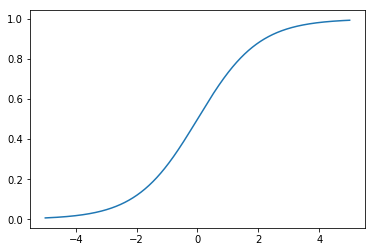

In [12]:
x = np.linspace(-5, 5, 1000)
y = 1./(np.exp(-x) + 1)
plt.plot(x, y)
plt.show()

In [3]:
a = [[-2.21921005, -2.21921005], [-0.69062001, -0.69062001], [-0.69062001, -0.69062001],[-0.69062001, -0.69062001],[ 0.69062001,  0.69062001], [ 0.69062001,  0.69062001], [ 0.69062001,  0.69062001], [ 2.21921005,  2.21921005]]
np.unique(a)

array([-2.21921005, -0.69062001,  0.69062001,  2.21921005])

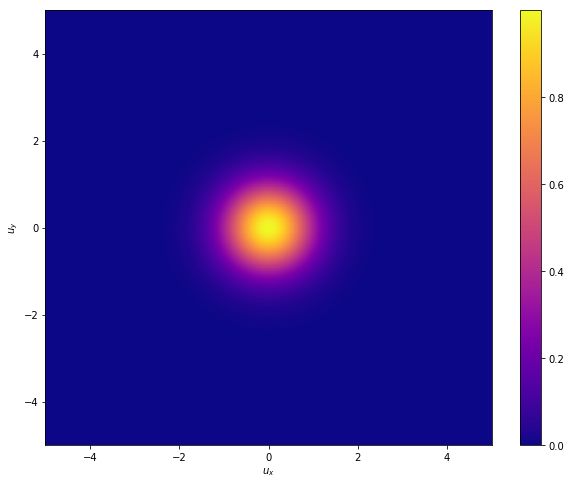

In [111]:
rx = np.linspace(-5, 5, 1000)
ry = np.linspace(-5, 5, 1000)
ux, uy = np.meshgrid(rx, ry)
extent = (-5, 5, -5, 5)
func = np.exp(-ux**2-uy**2) # 1./((ux**2+uy**2)**1.5+1.) # np.exp(-(ux**2+uy**2)**0.5)
plt.figure(figsize = (10, 8))
plt.imshow(func, origin = 'lower', aspect = 'auto', extent = extent, cmap = 'plasma')
plt.xlabel(r'$u_x$')
plt.ylabel(r'$u_y$')
plt.colorbar()
plt.show()

In [15]:
mat1 = np.loadtxt('dspectra4.00.dat')
mat2 = np.loadtxt('dspectra4.01.dat')
mat3 = np.loadtxt('dspectra4.02.dat')
mat4 = np.loadtxt('dspectra4.03.dat')
mat = np.concatenate((mat1, mat2, mat3, mat4), axis=0)

In [14]:
np.concatenate?

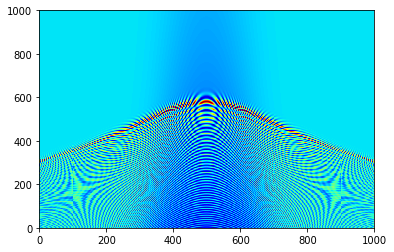

In [18]:
plt.imshow(mat.T, aspect = 'auto', cmap = 'jet', origin = 'lower')
plt.show()

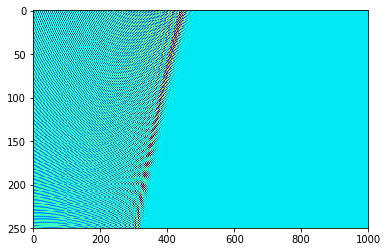

In [9]:
plt.imshow(mat4, aspect = 'auto', cmap = 'jet')
plt.show()

In [5]:
upxvec = np.linspace(-5., 2., 1000)
plt.plot(upxvec, mat.T[1090])
plt.show()

IndexError: index 1090 is out of bounds for axis 0 with size 1000

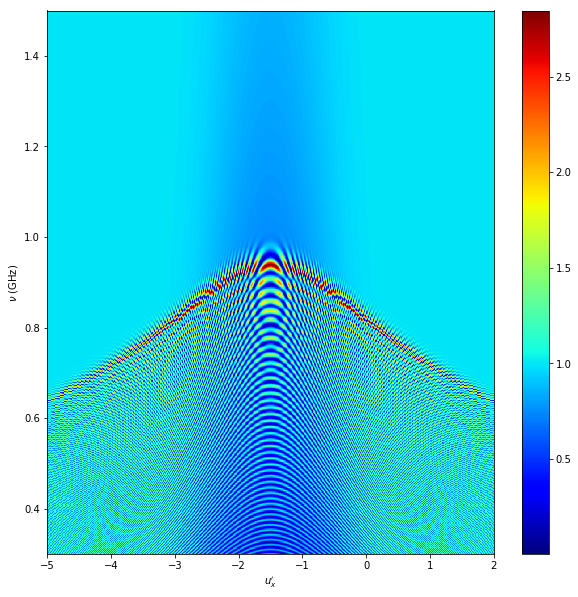

In [4]:
extent = (-5, 2, 0.3, 1.5)
plt.figure(figsize = (10, 10))
plt.imshow(mat.T, origin = 'lower', extent = extent, aspect = 'auto', cmap = 'jet')
plt.xlabel(r"$u_x'$")
plt.ylabel(r'$\nu$ (GHz)')
plt.colorbar()
plt.show()

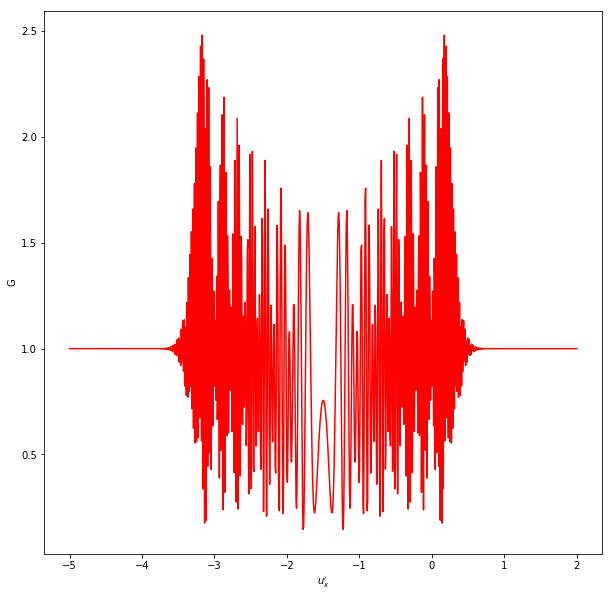

In [18]:
upxvec = np.linspace(-5., 2., 1000)
i = (0.8 - 0.3)/(1.5-0.3)*1000
plt.figure(figsize = (10, 10))
plt.plot(upxvec, mat.T[int(i)], color = 'red')
plt.xlabel(r"$u_x'$")
plt.ylabel('G')
plt.show()

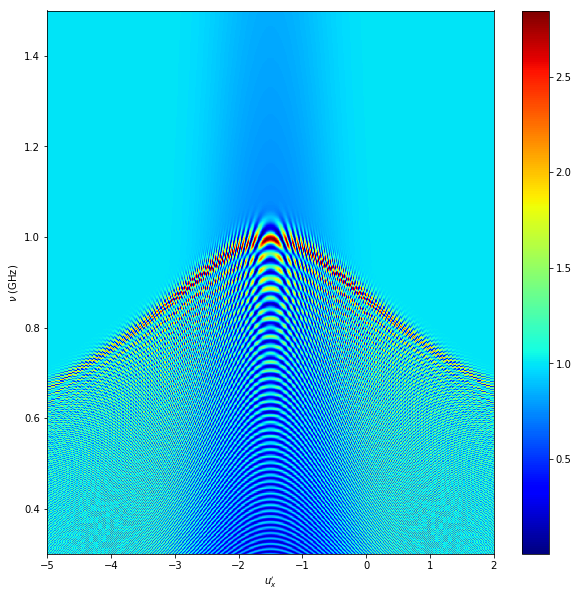

In [19]:
extent = (-5, 2, 0.3, 1.5)
plt.figure(figsize = (10, 10))
plt.imshow(mat.T, origin = 'lower', extent = extent, aspect = 'auto', cmap = 'jet')
plt.xlabel(r"$u_x'$")
plt.ylabel(r'$\nu$ (GHz)')
plt.colorbar()
plt.show()

In [14]:
f_handle = file('test.dat', 'a')
np.savetxt(f_handle, [[1, 2, 4, 4]])
np.savetxt(f_handle, [[5, 6, 7]])
f_handle.close()

In [9]:
int(1000*(1.5-0.8)/(1.5-0.3))

583

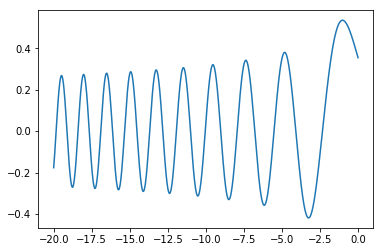

In [9]:
x = np.linspace(-20, 0, 1000)
air = airy(x)
plt.plot(x, air[0])
plt.show()

In [15]:
env = (air[0]**2 + air[2]**2)**0.5/2.5

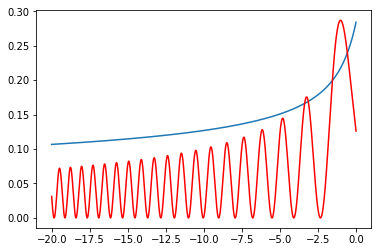

In [16]:
plt.plot(x, env)
plt.plot(x, air[0]**2, color = 'red')
plt.show()

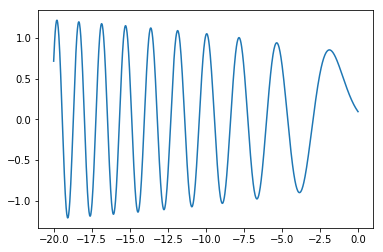

In [19]:
plt.plot(x, air[0] + air[1])
plt.show()

In [20]:
from scipy.special import ai_zeros

In [22]:
ai_zeros(1)

(array([-2.33810741]),
 array([-1.01879297]),
 array([ 0.53565666]),
 array([ 0.70121082]))

In [24]:
zeros = []
for n in range(1, 100):
    zeros.append(ai_zeros(n)[1])

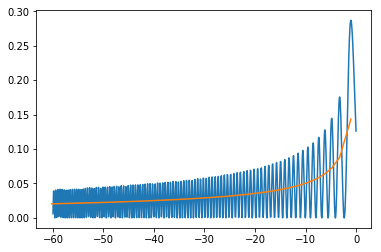

In [37]:
env = airy(ai_zeros(100)[1])[0]**2
x = np.linspace(-60, 0, 1000)
plt.plot(x, airy(x)[0]**2)
plt.plot(ai_zeros(100)[1], env/2.)
plt.show()

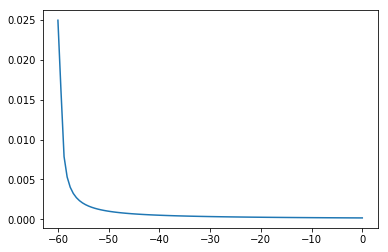

In [43]:
x = np.linspace(-60, 0, 100)
plt.plot(x, np.gradient(env/2., ai_zeros(100)[1]))
plt.show()

In [44]:
from scipy.interpolate import interp1d

In [50]:
env = interp1d(ai_zeros(100)[1], airy(ai_zeros(100)[1])[0]**2/2., kind = 'cubic', fill_value = 'extrapolate')

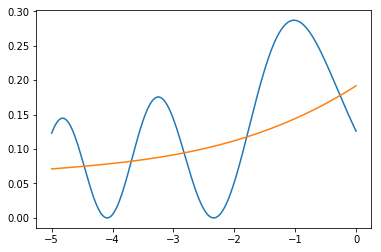

In [54]:
x = np.linspace(-5, 0, 1000)
plt.plot(x, airy(x)[0]**2)
plt.plot(x, env(x))
plt.show()

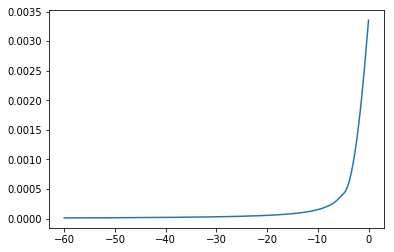

In [53]:
plt.plot(x, np.gradient(env(x)))
plt.show()

In [55]:
import os
os.chdir('/home/gian/Documents/Research/NANOGrav/Lensing/Data/')

In [57]:
data = np.loadtxt('resids.txt').T
dates = data[0]

In [65]:
ind = np.where(np.logical_and(dates < 57515., dates > 57505))[0]

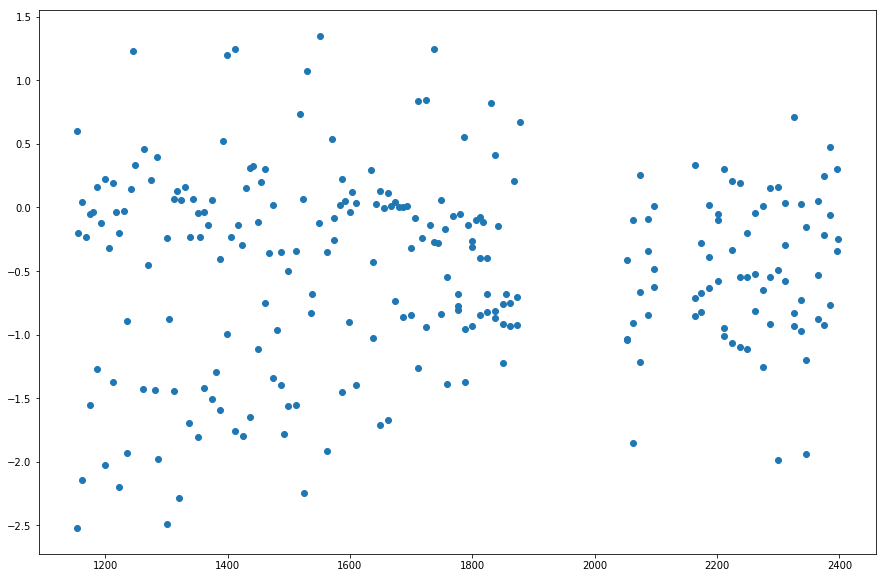

In [68]:
plt.figure(figsize = (15, 10))
plt.scatter(data[1][ind], data[2][ind])
plt.show()

In [69]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

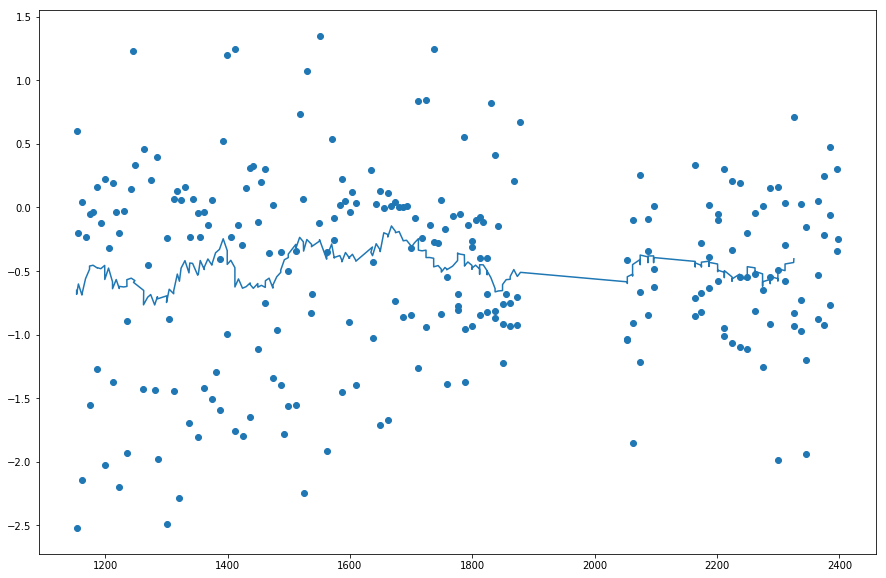

In [78]:
plt.figure(figsize = (15, 10))
plt.scatter(data[1][ind], data[2][ind])
plt.plot(data[1][ind][:-19], moving_average(data[2][ind], n = 20))
plt.show()

In [11]:
a = np.ones([2, 10])
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [15]:
np.sum(a, axis = 0)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])